<a href="https://colab.research.google.com/github/KhanutBJ/EEG/blob/master/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Builders project : EEG-based Neurofeedback for Migraine**

Khanut Boonjong

Installing libraries

In [2]:
pip install mne

     |████████████████████████████████| 7.5 MB 1.1 MB/s 


In [3]:
import numpy as np
import pandas as pd
import mne as mne
import os

Loading dataset

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!unzip "/content/gdrive/My Drive/AI Builders/12636731.zip"
#link to dataset: https://drive.google.com/drive/folders/1YkWcl97B4gKHJlxf8dPDmWb2kDbQyRXj?usp=sharing

Archive:  /content/gdrive/My Drive/AI Builders/12636731.zip
 extracting: README.txt              
 extracting: Migraine_Control_Demographics.xlsx  
 extracting: EEG experiment protocol_Migraine_Brain_KiltHub_vF.pdf  
 extracting: EEG_Stimuli.zip         
 extracting: M1_1.zip                
 extracting: M2_1.zip                
 extracting: M3_2.zip                
 extracting: M4_1.zip                
 extracting: M5_1.zip                
 extracting: M6_1.zip                
 extracting: M7_1.zip                
 extracting: M8_2.zip                
 extracting: M9_2.zip                
 extracting: M10_1.zip               
 extracting: M11_1.zip               
 extracting: M12_2.zip               
 extracting: M13_2.zip               
 extracting: M14_1.zip               
 extracting: M15_2.zip               
 extracting: M16_1.zip               
 extracting: M17_1.zip               
 extracting: M18_1.zip               
 extracting: C1.zip                  
 extracting: C2.zip    

In [9]:
! unzip M1_1.zip

Archive:  M1_1.zip
   creating: M1_1/
  inflating: __MACOSX/._M1_1         
  inflating: M1_1/.DS_Store          
  inflating: __MACOSX/M1_1/._.DS_Store  
  inflating: M1_1/M1vis_migraine.txt  
  inflating: __MACOSX/M1_1/._M1vis_migraine.txt  
  inflating: M1_1/M1aud_migraine.txt  
  inflating: __MACOSX/M1_1/._M1aud_migraine.txt  
  inflating: M1_1/M1_SSAEP.bdf       
  inflating: __MACOSX/M1_1/._M1_SSAEP.bdf  
  inflating: M1_1/M1_SSVEP.bdf       
  inflating: __MACOSX/M1_1/._M1_SSVEP.bdf  
  inflating: M1_1/M1resting.bdf      
  inflating: __MACOSX/M1_1/._M1resting.bdf  


In [39]:
raw = mne.io.read_raw_bdf('/content/M1_1/M1resting.bdf', preload=True)
raw.rename_channels(lambda s: s.strip("."))
raw.set_montage("standard_1020", match_case=False, on_missing='warn')
raw.set_eeg_reference("average")

Extracting EDF parameters from /content/M1_1/M1resting.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 407551  =      0.000 ...   795.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<ipython-input-39-f6d1dd0ac4a8>:3: RuntimeWarning: DigMontage is only a subset of info. There are 69 channel positions not present in the DigMontage. The required channels are:

['AFp1', 'AFF5h', 'AFF1h', 'FFT9h', 'FFT7h', 'FFC5h', 'FFC3h', 'FFC1h', 'FTT9h', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'TPP7h', 'CPP5h', 'CPP3h', 'CPP1h', 'PPO9h', 'PPO5h', 'PPO1h', 'POO9h', 'POO1', 'I1', 'OI1h', 'AFp2', 'AFF2h', 'AFF6h', 'FFC2h', 'FFC4h', 'FFC6h', 'FFT8h', 'FFT10h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h', 'FTT10h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CPP2h', 'CPP4h', 'CPP6h', 'TPP8h', 'PPO2h', 'PPO6h', 'PPO10h', 'POO2', 'POO10h', 'OI2h', 'I2', 'LO1', 'LO2', 'IO1', 'SO1', 'IO2', 'ECG', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage("standard_1020", match_case=False, on

<RawEDF | M1resting.bdf, 144 x 407552 (796.0 s), ~447.9 MB, data loaded>

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


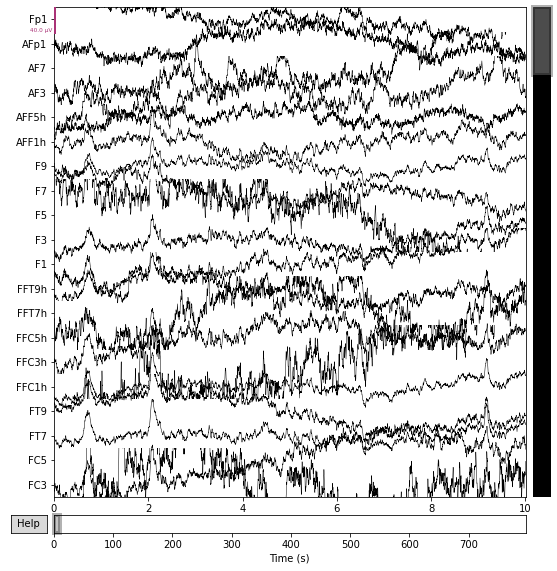

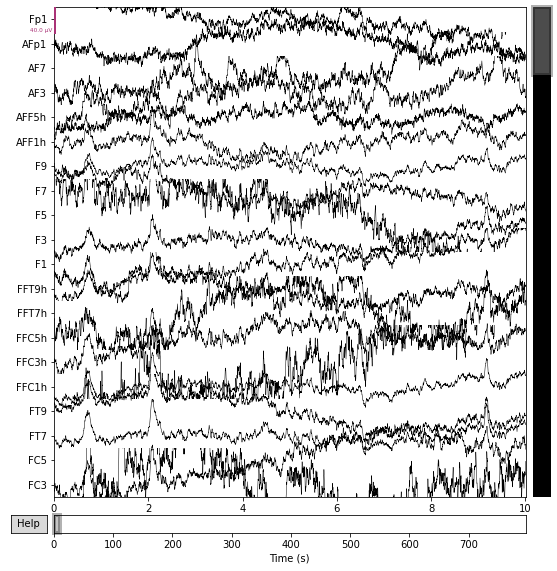

In [40]:
raw.plot()

In [ ]:
! unzip C1.zip

Archive:  C1.zip
replace __MACOSX/._C1? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [42]:
raw_control = mne.io.read_raw_bdf('/content/C1/C1_Resting.bdf', preload=True)
raw_control.rename_channels(lambda s: s.strip("."))
raw_control.set_montage("standard_1020", match_case=False, on_missing='warn')
raw_control.set_eeg_reference("average")

Extracting EDF parameters from /content/C1/C1_Resting.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 206847  =      0.000 ...   403.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<ipython-input-42-93aab25851ee>:3: RuntimeWarning: DigMontage is only a subset of info. There are 69 channel positions not present in the DigMontage. The required channels are:

['AFp1', 'AFF5h', 'AFF1h', 'FFT9h', 'FFT7h', 'FFC5h', 'FFC3h', 'FFC1h', 'FTT9h', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'TPP7h', 'CPP5h', 'CPP3h', 'CPP1h', 'PPO9h', 'PPO5h', 'PPO1h', 'POO9h', 'POO1', 'I1', 'OI1h', 'AFp2', 'AFF2h', 'AFF6h', 'FFC2h', 'FFC4h', 'FFC6h', 'FFT8h', 'FFT10h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h', 'FTT10h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CPP2h', 'CPP4h', 'CPP6h', 'TPP8h', 'PPO2h', 'PPO6h', 'PPO10h', 'POO2', 'POO10h', 'OI2h', 'I2', 'LO1', 'LO2', 'IO1', 'SO1', 'IO2', 'ECG', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage("standard_1020", match_case=False, on

<RawEDF | M1resting.bdf, 144 x 407552 (796.0 s), ~447.9 MB, data loaded>

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


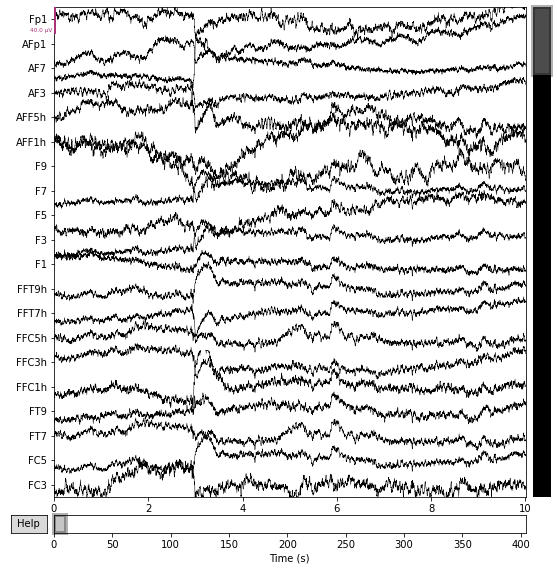

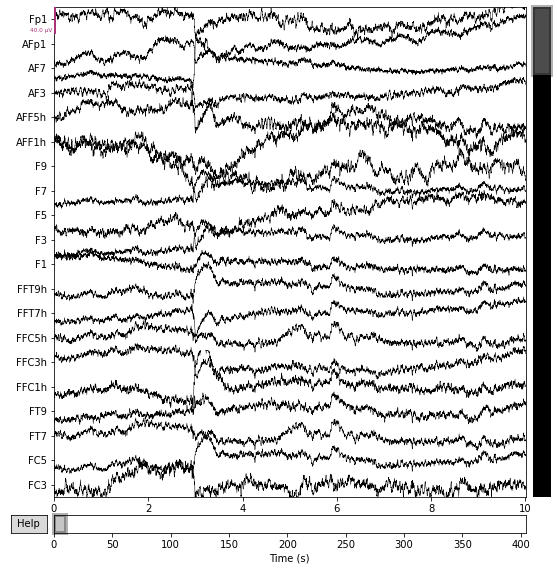

In [43]:
raw_control.plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 6 - 25 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 6.00, 25.00 Hz: -6.02, -6.02 dB

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


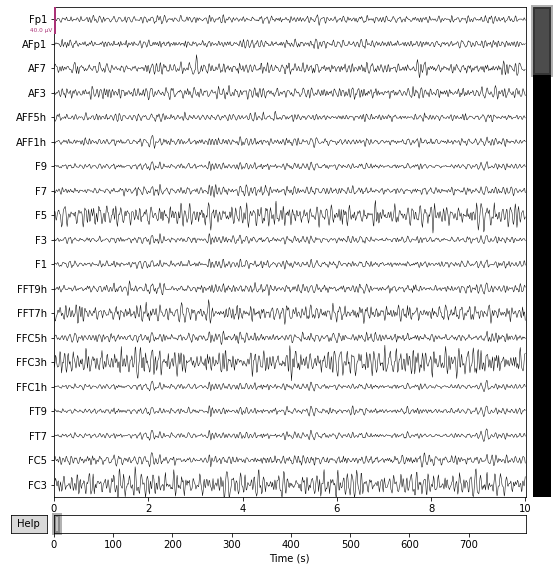

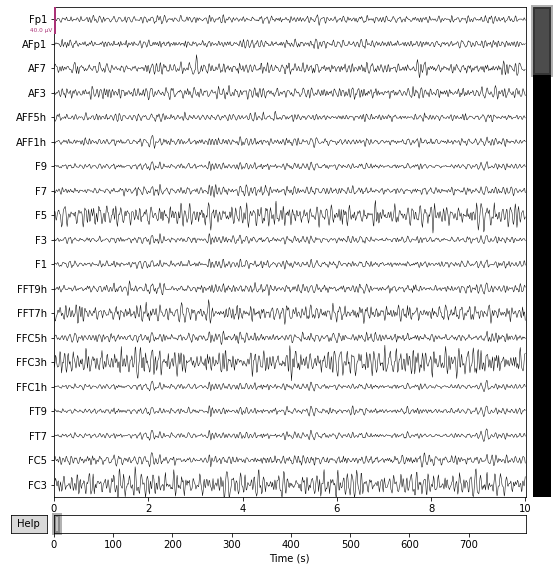

In [44]:
raw.notch_filter(50)
raw_filt = raw.copy().filter(6,25, method='iir', iir_params=dict(ftype='butter', order=2))
raw_filt.plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 6 - 25 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 6.00, 25.00 Hz: -6.02, -6.02 dB

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


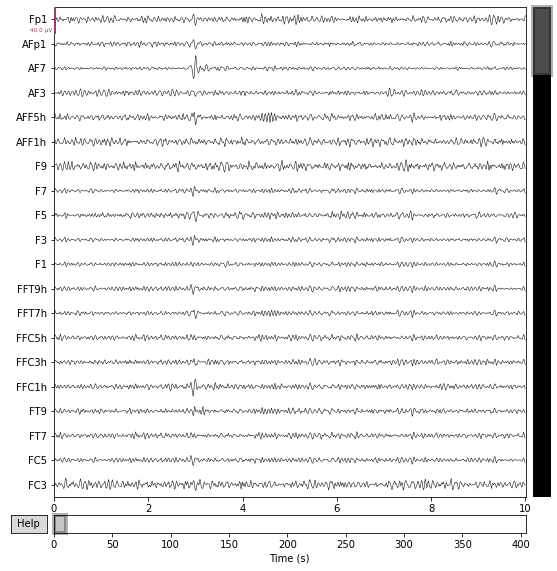

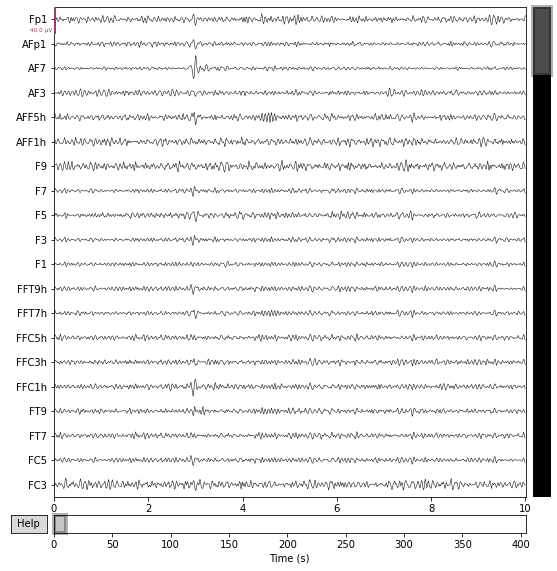

In [45]:
raw_control.notch_filter(50)
raw_filt_control = raw_control.copy().filter(6,25, method='iir', iir_params=dict(ftype='butter', order=2))
raw_filt_control.plot()

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


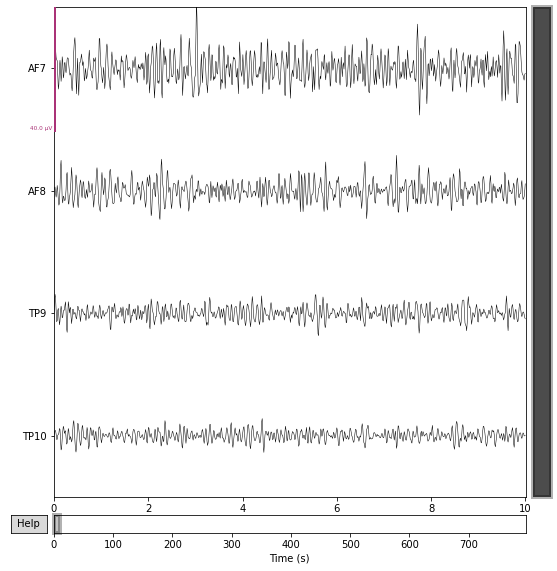

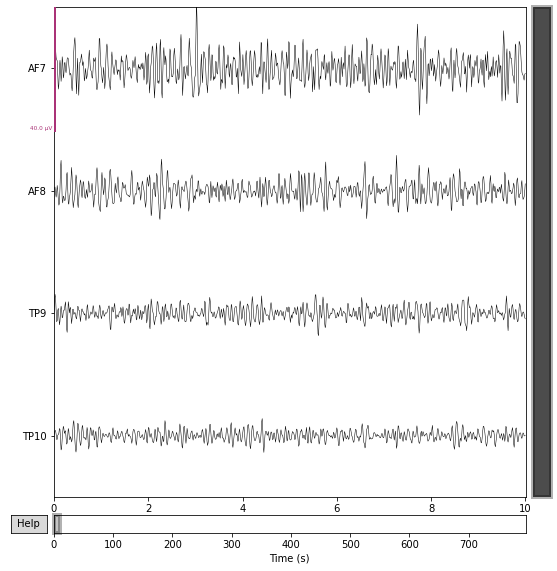

In [46]:
raw_filt.pick_channels(['AF7', 'AF8', 'TP9','TP10'], ordered=True)
raw_filt.plot()

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


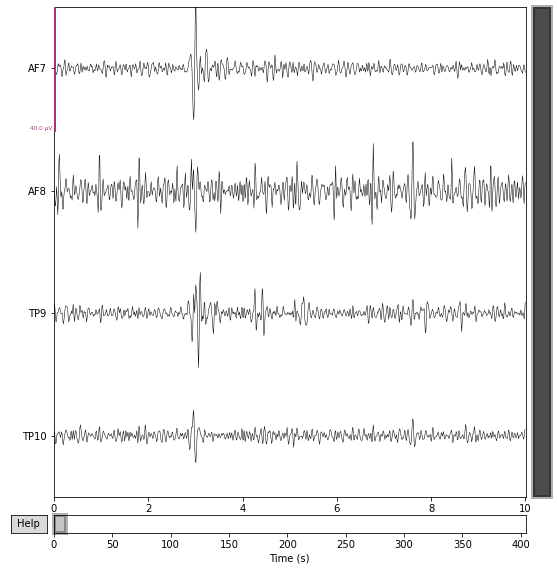

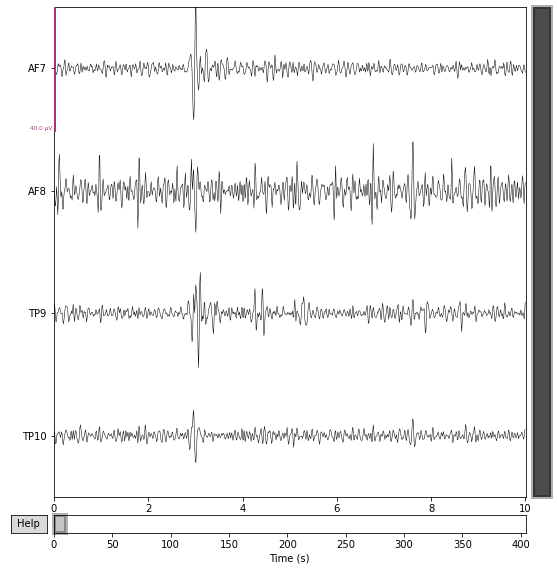

In [47]:
raw_filt_control.pick_channels(['AF7', 'AF8', 'TP9','TP10'], ordered=True)
raw_filt_control.plot()